<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8.2. Deep Learning SRNN</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [6]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [7]:
datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_seg2_standarizado = pd.read_csv('../datos/csv/seg2_stscaler.csv', sep=',')
datosEEG_seg3_standarizado = pd.read_csv('../datos/csv/seg3_stscaler.csv', sep=',')
datosEEG_seg4_standarizado = pd.read_csv('../datos/csv/seg4_stscaler.csv', sep=',')
datosEEG_std_after = pd.read_csv('../datos/csv/all_stscaler_after.csv', sep=',')
datosEEG_std_before = pd.read_csv('../datos/csv/all_stscaler_before.csv', sep=',')


datosEEG_all = [datosEEG_seg1_standarizado, datosEEG_seg2_standarizado, datosEEG_seg3_standarizado, datosEEG_seg4_standarizado, datosEEG_std_after, datosEEG_std_before]
datosEEG_all_nombres = {'segmento_1':datosEEG_seg1_standarizado, 'segmento_2':datosEEG_seg2_standarizado, 'segmento_3':datosEEG_seg3_standarizado,'segmento_4':datosEEG_seg4_standarizado, 'all_std_after':datosEEG_std_after, 'all_std_before':datosEEG_std_before}
nombre_clases = valores_key(datosEEG_seg1_standarizado)

# Simple RNN (Simple Recurrent Neural Networks)

In [8]:

# Compilar el modelo
#model_srnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_srnn = crear_modelo_SRNN(TIMESTEPS, FEATURES, NUM_CLASES)


C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


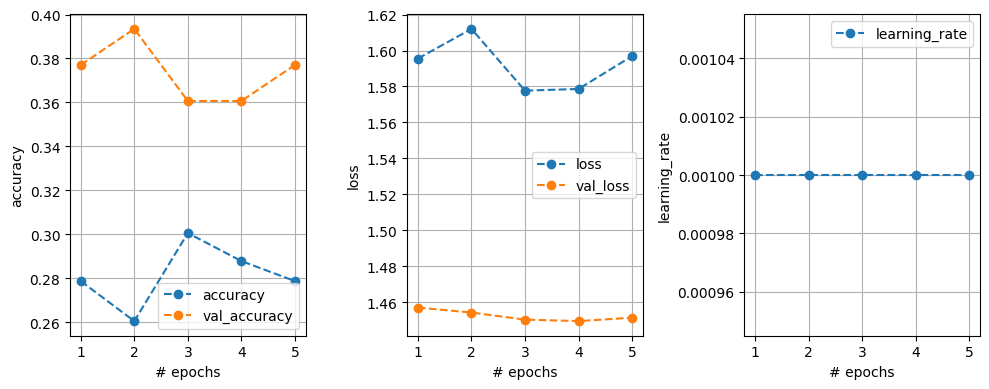

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.2726 - loss: 1.6085 - val_accuracy: 0.3770 - val_loss: 1.4515 - learning_rate: 0.0010
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [9]:
#experimentos_nor = [experimento_1_nor, experimento_2_nor, experimento_3_nor, experimento_4_nor]
accuracy_score_srnn = []
accuracy_score_test_srnn =[]
matriz_confusion_srnn = []
matriz_confusion_test_srnn = []
total_simple_rnn_trained = []

for dataset in datosEEG_all:
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataset)
    
    X_train, X_val, X_test = reshapeo (X_train, X_val, X_test)
        
    # Entrenar el modelo
    simple_rnn_trained = model_srnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint_srnn, plot_learning])

    y_pred = model_srnn.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
        
    y_pred_test = model_srnn.predict(X_test)
    y_pred_classes_test = np.argmax(y_pred_test, axis=1)
    

    accuracy_score_srnn.append(accuracy_score(y_val, y_pred_classes))
    matriz_confusion_srnn.append(confusion_matrix(y_val, y_pred_classes))
    
    accuracy_score_test_srnn.append(accuracy_score(y_test, y_pred_classes_test))
    matriz_confusion_test_srnn.append(confusion_matrix(y_test, y_pred_classes_test))
    
    total_simple_rnn_trained.append(simple_rnn_trained)




,SRNN
Segmento 1,0.250000
Segmento 2,0.200000
Segmento 3,0.222222
Segmento 4,0.222222
All Segmentos after,0.377049
All Segmentos before,0.377049


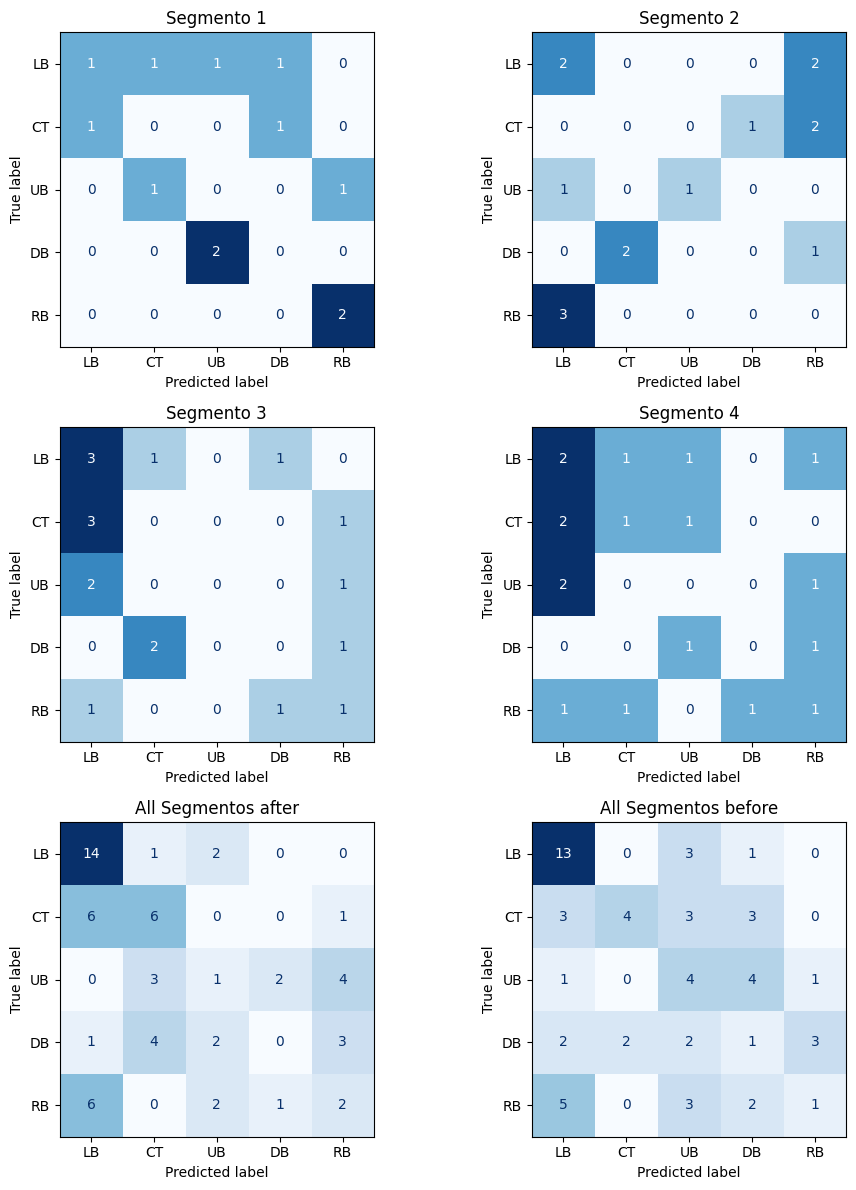

In [10]:
datos_srnn = pd.DataFrame(accuracy_score_srnn, columns=['SRNN'], index=(titulos_all))

display(datos_srnn)

mc_srnn = []

for matrices_srnn in matriz_confusion_srnn:

    mc_srnn.append(pd.DataFrame(matrices_srnn, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_srnn[0], mc_srnn[1], mc_srnn[2], mc_srnn[3], mc_srnn[4], mc_srnn[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()


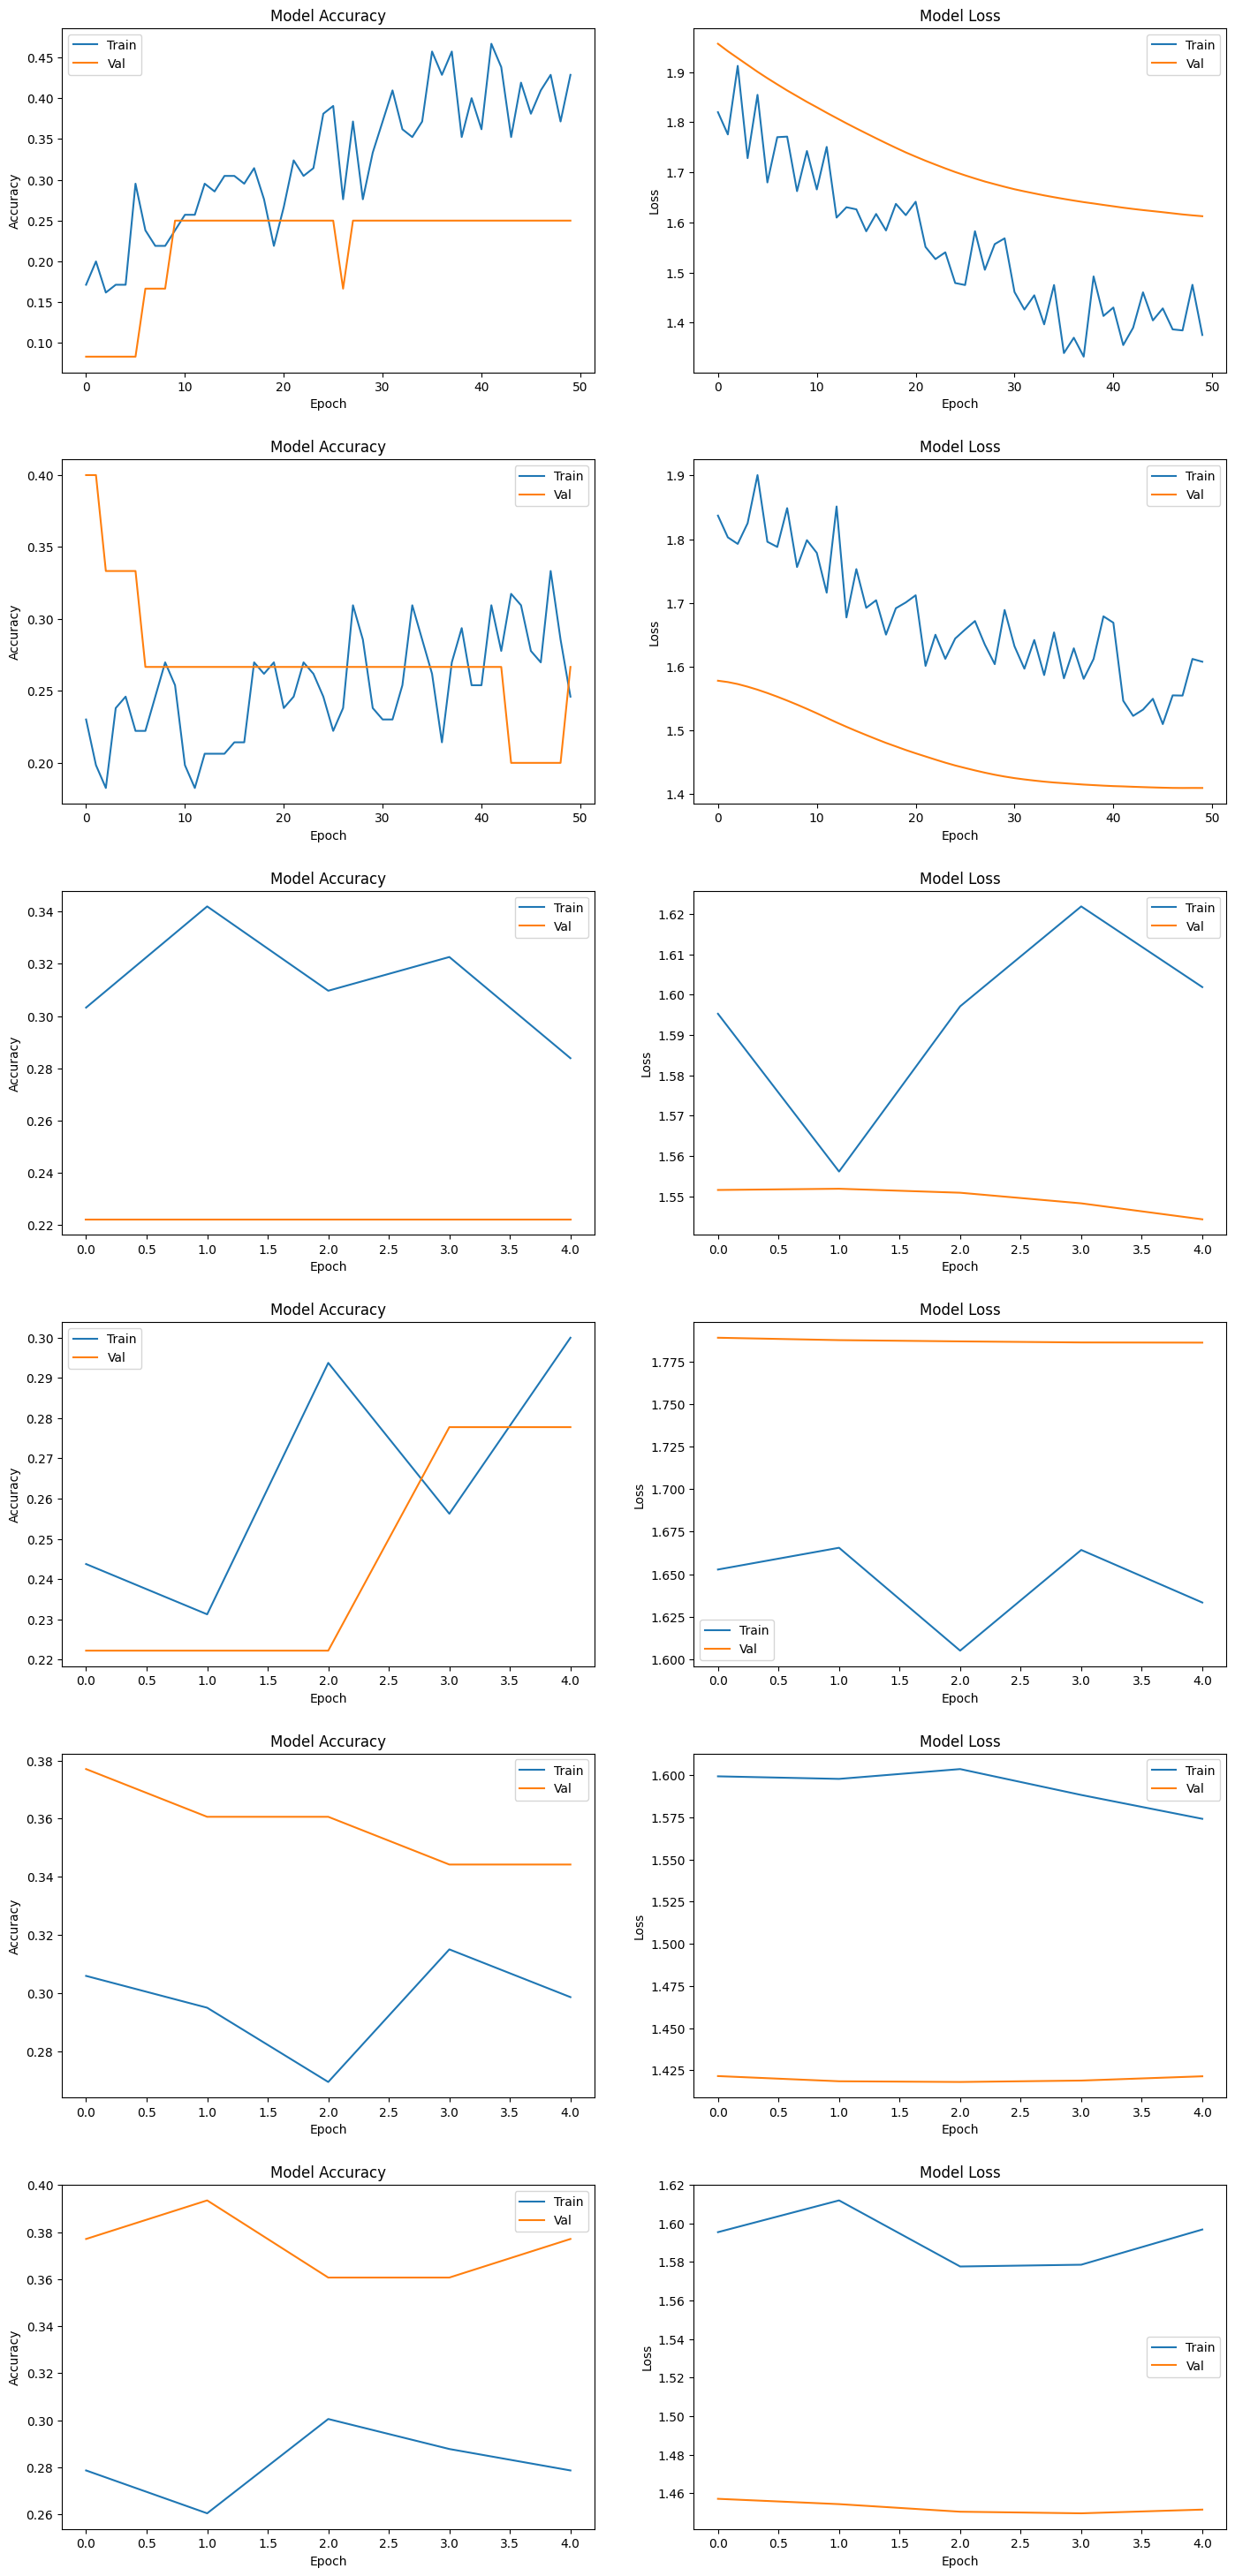

In [13]:

# Crear una figura con 12 subgráficos (6 filas y 2 columnas)
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# Asegurarse de que haya suficiente espacio entre los subgráficos
plt.tight_layout(pad=5.0)

# Alternar entre 'loss' y 'accuracy' para cada par de subgráficos
for idx, history in enumerate(total_simple_rnn_trained[:6]):
    i, j = divmod(idx * 2, 2)
    
    # Imprimir la gráfica de pérdida en el primer subgráfico del par
    print_chart(axes[i, j], "Model Accuracy", "Epoch", "Accuracy", 
            [history.history['accuracy'], history.history['val_accuracy']], ['Train', 'Val'])
    # Imprimir la gráfica de precisión (accuracy) en el segundo subgráfico del par
    i, j = divmod(idx * 2 + 1, 2)
    print_chart(axes[i, j], "Model Loss", "Epoch", "Loss", 
                [history.history['loss'], history.history['val_loss']], ['Train', 'Val'])

# Mostrar todas las gráficas en una sola figura
plt.show()


,SRNN
Segmento 1,0.538462
Segmento 2,0.437500
Segmento 3,0.100000
Segmento 4,0.250000
All Segmentos after,0.352941
All Segmentos before,0.294118


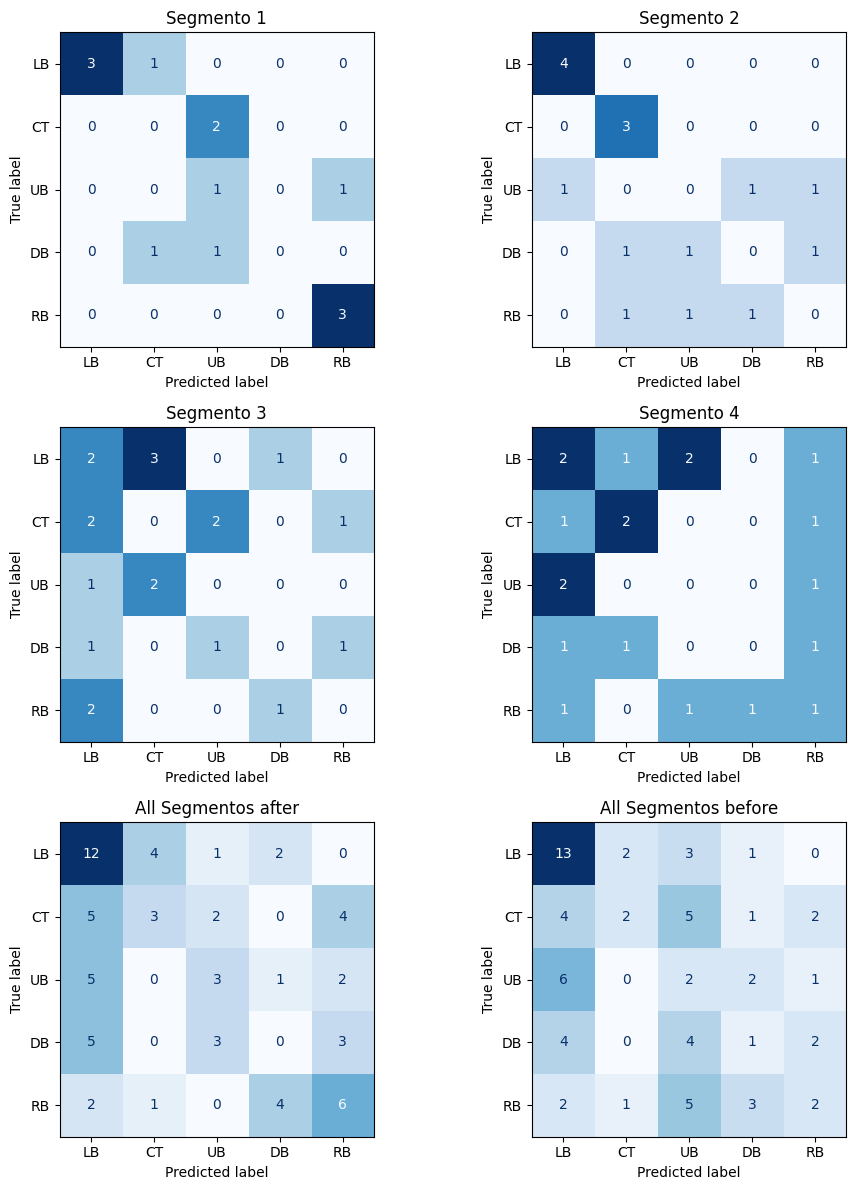

In [14]:
datos_srnn = pd.DataFrame(accuracy_score_test_srnn, columns=['SRNN'], index=(titulos_all))

display(datos_srnn)

mc_srnn = []

for matrices_srnn in matriz_confusion_test_srnn:

    mc_srnn.append(pd.DataFrame(matrices_srnn, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_srnn[0], mc_srnn[1], mc_srnn[2], mc_srnn[3], mc_srnn[4], mc_srnn[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()